In [105]:
# Import packages
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
# Read the Titanic dataset from a CSV file into a DataFrame
df = pd.read_csv("titanic.csv")

# Display the first few rows of the DataFrame
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [107]:
# Understanding the structure and characteristics of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [108]:
# Dropping unnecessary columns
df = df.drop(['Cabin', 'PassengerId', 'Name', 'Ticket'], axis=1)
# PassengerId: Does not provide any useful information for predicting survival.
# Name: Does not provide any useful information for predicting survival
# Ticket: Contains alphanumeric values, which might not have a direct correlation with survival.
# Cabin: High number of missing values (NaN)

In [109]:
# Checking for missing data
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [110]:
# Using meadian to fill in missing data

# Calculate median
median_age = df['Age'].median()

# Impute missing age values with median
df['Age'] = df['Age'].fillna(median_age)

# Dropping x2 nan values
df = df.dropna(subset=['Embarked'])

# Checking changes
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [111]:
# Encoding categorical features 

# Initialise the LabelEncoder
encoder = LabelEncoder()

# Fit and transform the "Sex" column
df['Sex'] = encoder.fit_transform(df['Sex'])

# Fit and transform the "Embarked" column
df['Embarked'] = encoder.fit_transform(df['Embarked'])

# Checking changes
df.head()

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

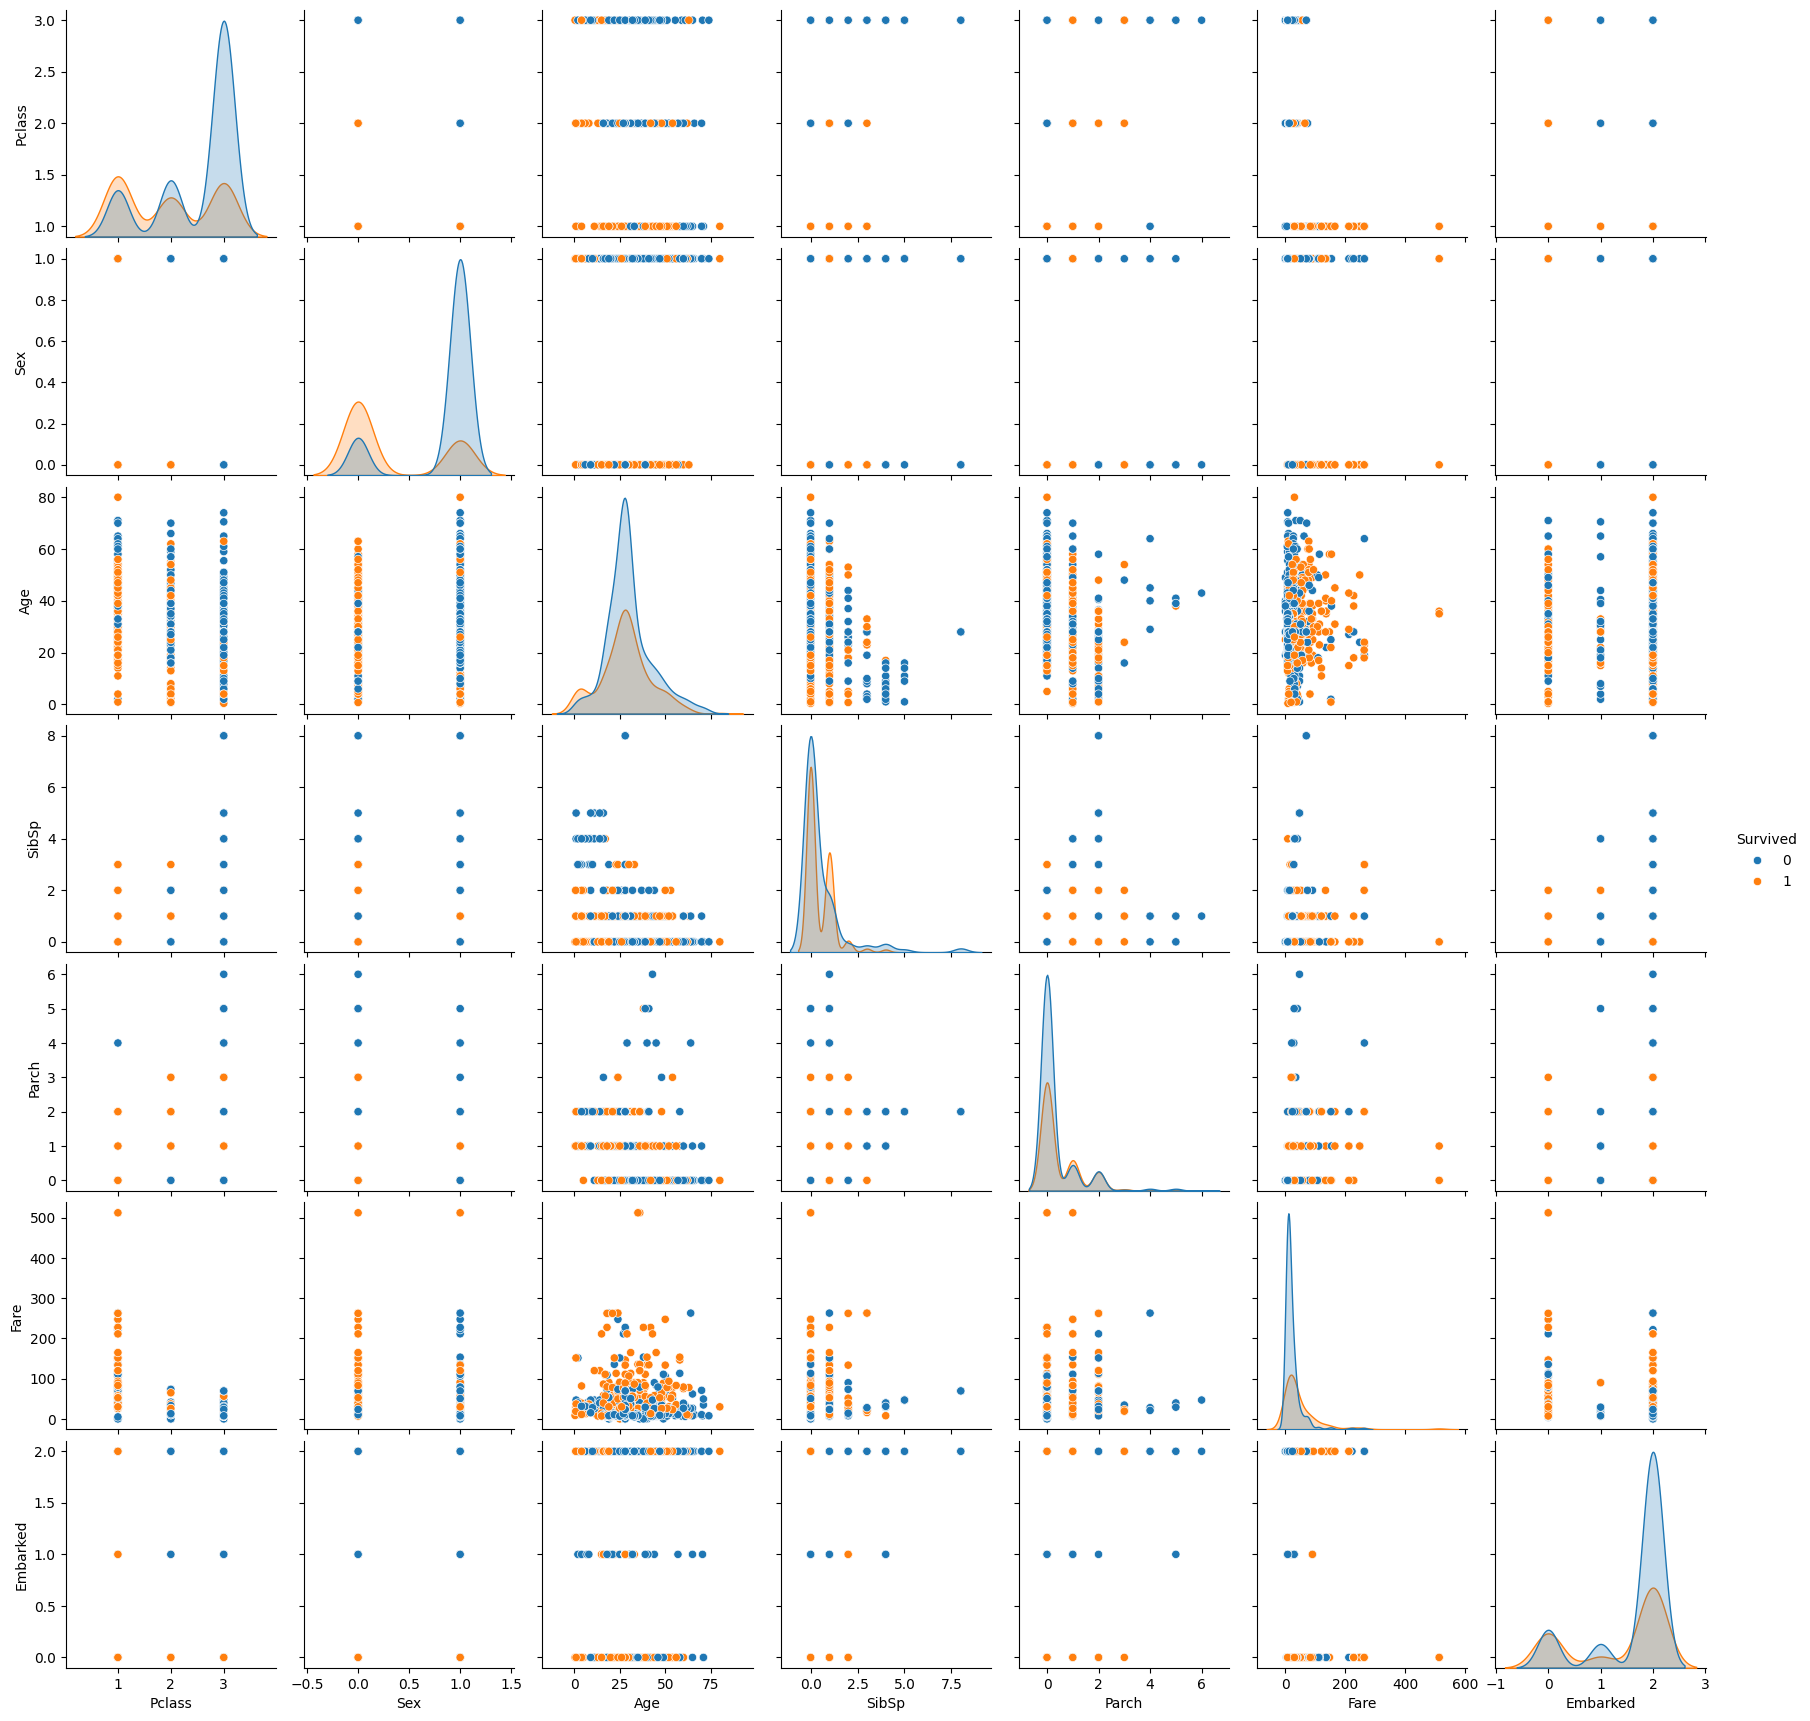

In [112]:
# Visualisation of current data with Survived as hue 
sns.pairplot(df, hue='Survived')

In [113]:
# X represents the feature set (independent variables) for your model
X = df.drop('Survived', axis=1)
# y represents the target variable (dependent variable) for your model
y = df['Survived']

# Store the column names of the X dataframe in the variable 'feature_names'
feature_names = X.columns

# Print the list of feature
feature_names

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [114]:
# Split the data into training, development, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70% training and 30% test

In [115]:
# Create a random forest classifier with 100 estimators and a random state of 42
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest on the training data
rf.fit(X_train, y_train)

# Predict the response for the test dataset
y_test_pred_rf = rf.predict(X_test)

# Perform k-fold cross-validation (k=5)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)
cv_accuracy = cv_scores.mean()

# Display the cross-validation scores and accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean CV accuracy:", cv_accuracy)

# Calculate and display the accuracy for the test dataset
rf_accuracy = accuracy_score(y_test, y_test_pred_rf)
print(f'Accuracy for Random Forest model: {rf_accuracy}')

Cross-Validation Scores: [0.816      0.832      0.86290323 0.83870968 0.82258065]
Mean CV accuracy: 0.8344387096774193
Accuracy for Random Forest model: 0.7640449438202247


In [116]:
#Finding the important features using the built-in Gini importance
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False)
feature_imp_df

Feature  Gini Importance
5      Fare         0.276818
1       Sex         0.254636
2       Age         0.248988
0    Pclass         0.085481
3     SibSp         0.049841
4     Parch         0.044561
6  Embarked         0.039675

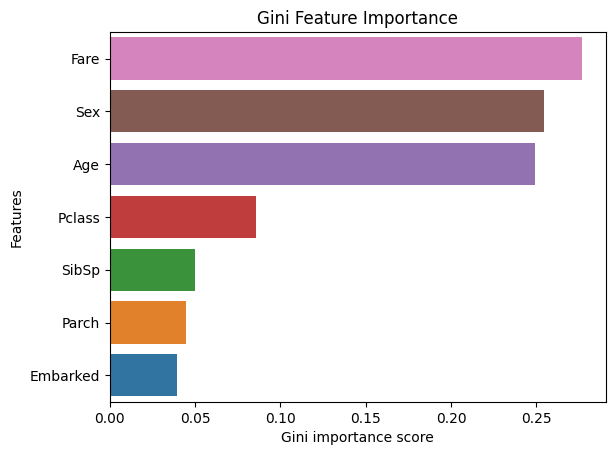

In [117]:
# Creating a seaborn bar plot of feature importance
sns.barplot(data=feature_imp_df, x='Gini Importance', y='Feature', hue='Gini Importance', palette='tab10', legend=False)
plt.title("Gini Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")
plt.show()

In [118]:
# Drop the least important features from X_train and X_test 
X_train = X_train.drop(['Embarked','Parch'], axis=1)
X_test = X_test.drop(['Embarked','Parch'], axis=1)

In [119]:
# Create a Bagging Tree classifier
bagged_tree = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Training and predicting with the Bagging Tree model
bagged_tree.fit(X_train, y_train)
y_test_pred_bagged = bagged_tree.predict(X_test)

# Calculate and print the accuracy for the Bagging Tree model
bagged_accuracy = accuracy_score(y_test, y_test_pred_bagged)
print(f'Accuracy for Bagging Tree model: {bagged_accuracy}')

Accuracy for Bagging Tree model: 0.7902621722846442


In [120]:
# Create a Boosted Tree classifier
boosted_tree = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Training and predicting with the Boosted Tree model
boosted_tree.fit(X_train, y_train)
y_test_pred_boosted = boosted_tree.predict(X_test)

# Calculate and print the accuracy for the Boosted Tree model
boosted_accuracy = accuracy_score(y_test, y_test_pred_boosted)
print(f'Accuracy for Boosted Tree model: {boosted_accuracy}')

Accuracy for Boosted Tree model: 0.8127340823970037


C:\Users\VJ_la\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [121]:
# Hyperparameter tuning for Random Forest using GridSearchCV

# Setting parameters
params = {
    'n_estimators': [2, 5, 8, 10, 100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 5, 10],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=params,cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

# Grid search on training data for hyperparameter
grid_search.fit(X_train, y_train)

# Get the best model and printing the best score
print(grid_search.best_score_)
best_rf_model = grid_search.best_estimator_
best_rf_model

Fitting 4 folds for each of 63 candidates, totalling 252 fits
0.8376033912324234


RandomForestClassifier(max_depth=5, n_estimators=5, random_state=42)

In [122]:
# Train the classifier with the model
best_rf_model.fit(X_train, y_train)
# Make predictions using the best Random Forest model
y_pred_best = best_rf_model.predict(X_test)

# Calculate and print the accuracy of the best model
param_tuned_tree = accuracy_score(y_test, y_pred_best)
print(f"Accuracy for the Fine-Tuned Random Forest model: {param_tuned_tree}")

Accuracy for the Fine-Tuned Random Forest model: 0.8352059925093633


In [123]:
# Print accuracies of all models
print(f'Accuracy for Bagging Tree model: {bagged_accuracy}')
print(f'Accuracy for Boosted Tree model: {boosted_accuracy}')
print(f'Accuracy for Random Forest model: {rf_accuracy}')
print(f'Accuracy for Fine-Tuned Random Forest model: {param_tuned_tree}')

Accuracy for Bagging Tree model: 0.7902621722846442
Accuracy for Boosted Tree model: 0.8127340823970037
Accuracy for Random Forest model: 0.7640449438202247
Accuracy for Fine-Tuned Random Forest model: 0.8352059925093633


#### The Fine-Tuned Random Forest model achieved the highest accuracy compared to all other models, scoring 0.8352 on the test dataset. The Boosted Tree model came in a close second with an accuracy of 0.8127. The Bagging Tree model performed well with an accuracy of 0.7903, while the Random Forest model with default settings had an accuracy of 0.7640.

### Based on the accuracy metric, the Fine-Tuned Random Forest model emerged as the top performer.